In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import datetime

In [14]:
df = pd.read_csv('covid_19_clean_complete.csv')
df['Date']=pd.to_datetime(df.Date, format= "%m/%d/%y")

In [15]:
df.head()

Province/State Country/Region      Lat     Long       Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000 2020-01-22          0   
1            NaN        Albania  41.1533  20.1683 2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596 2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218 2020-01-22          0   
4            NaN         Angola -11.2027  17.8739 2020-01-22          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0

In [108]:
df2=df.groupby(['Country/Region','Date'])['Deaths'].agg('sum')

In [109]:
df2=pd.DataFrame(df2)

In [118]:
df3=pd.DataFrame({'Country':pd.DataFrame(df2).index.get_level_values(0),
             'Date':pd.DataFrame(df2).index.get_level_values(1),
             'Deaths':df2['Deaths']})

In [121]:
df3=df3.reset_index(drop=True)

In [135]:
df3['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [133]:
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colors=get_colors(187) 

In [137]:
country_color= dict(zip(df3['Country'].unique(),colors))

In [164]:
ws=datetime.datetime(2018, 9, 15)

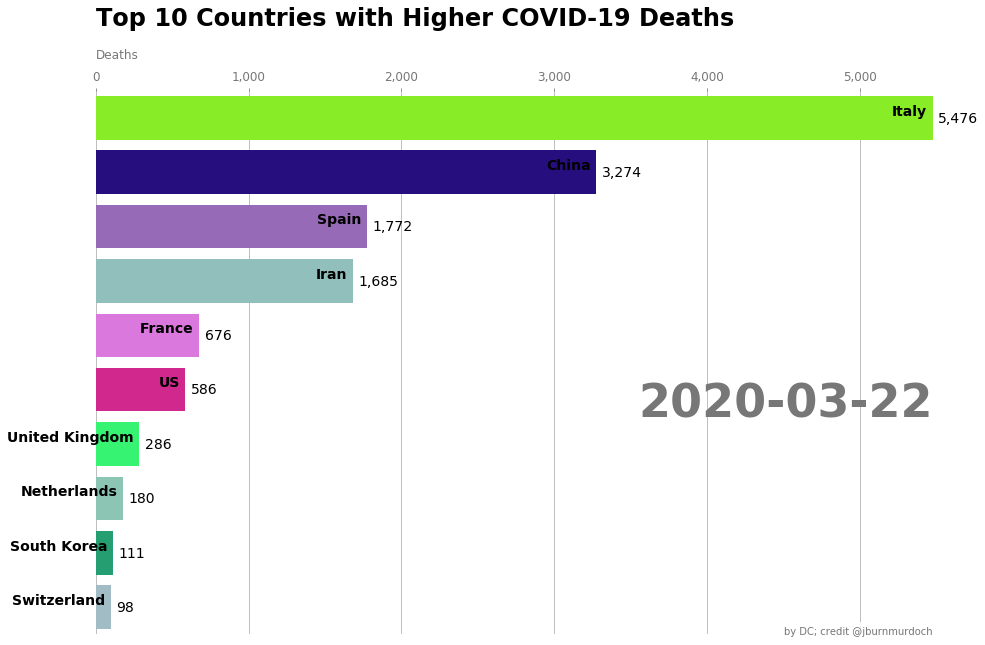

In [163]:
fig, ax = plt.subplots(figsize=(15,10))
def Draw_chart(date):
    data= df3[df3['Date'].eq(date)].sort_values(by='Deaths', ascending=True).tail(10)
    ax.clear()
    ax.barh(data['Country'],data['Deaths'], color=[country_color[x] for x in data['Country']] )
    dx = data['Deaths'].max() /150
    for i, (value, name) in enumerate(zip(data['Deaths'],data['Country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
        
        
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Deaths', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top 10 Countries with Higher COVID-19 Deaths',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by DC; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
Draw_chart('2020-03-22')

In [153]:
mydates = pd.date_range(start=min(df3['Date']), end=max(df3['Date']))

In [154]:
mydates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10'],
              dtype='datetime64[ns]', length=110, freq='D')

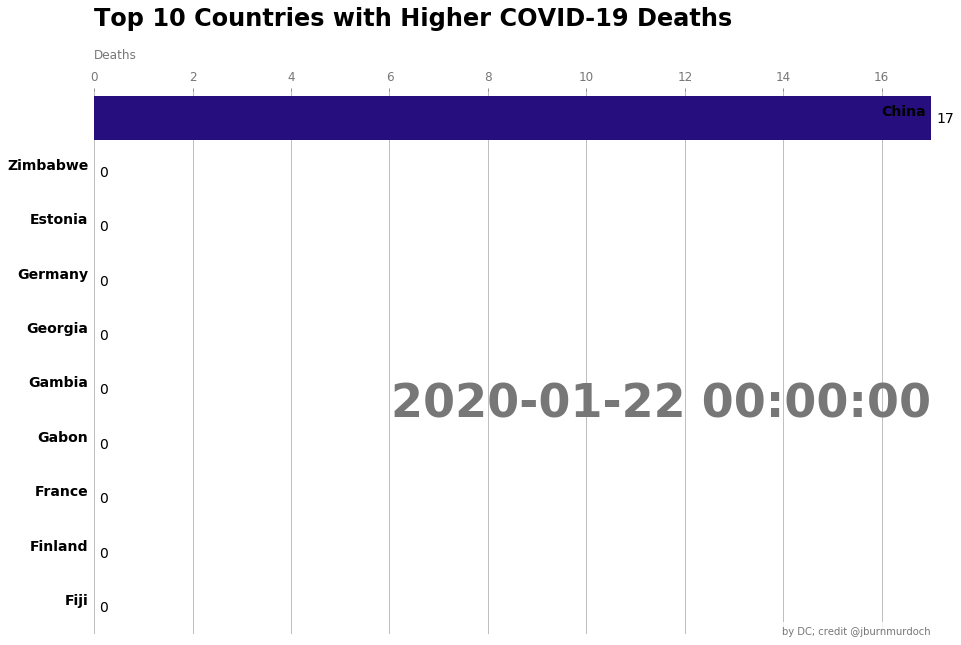

In [156]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 10))
animator = animation.FuncAnimation(fig, Draw_chart, frames=mydates)
HTML(animator.to_jshtml()) 